Step 1: Import necessary libraries

In [2]:
import numpy as np
import seaborn as sns #3-d plot
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


In [3]:
creditcard_df=pd.read_csv('/content/CC GENERAL.csv')

In [4]:
dummy=pd.read_csv('/content/CC GENERAL.csv')

In [5]:
creditcard_df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [6]:
creditcard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [7]:
creditcard_df.BALANCE.describe()

count     8950.000000
mean      1564.474828
std       2081.531879
min          0.000000
25%        128.281915
50%        873.385231
75%       2054.140036
max      19043.138560
Name: BALANCE, dtype: float64

In [8]:
creditcard_df.describe() #descriptive statistics 

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [9]:
#finding which one has max one-off purchase? 
creditcard_df[creditcard_df.ONEOFF_PURCHASES==creditcard_df.ONEOFF_PURCHASES.max()] 


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


In [10]:
#maximum advanced cash transaction
creditcard_df[creditcard_df['CASH_ADVANCE']==creditcard_df.CASH_ADVANCE.max()]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


Step 2: Visualization of datasets

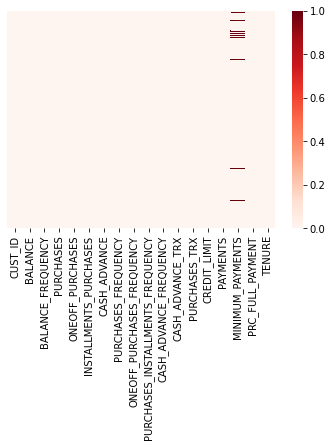

In [11]:
sns.heatmap(creditcard_df.isnull(),yticklabels=False,cmap="Reds")
#In min payments, we have null values.

In [12]:
creditcard_df.isnull().sum()
#how many null values in the data?

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [13]:
#replacing minimum value with average mean value.
creditcard_df.loc[(creditcard_df.MINIMUM_PAYMENTS.isnull()==True),'MINIMUM_PAYMENTS']=creditcard_df.MINIMUM_PAYMENTS.mean()

In [14]:
creditcard_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        1
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [15]:
#filling missing value in credit_limit column
creditcard_df.loc[(creditcard_df.CREDIT_LIMIT.isnull()==True),'CREDIT_LIMIT']=creditcard_df.CREDIT_LIMIT.mean()

In [16]:
creditcard_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [17]:
#checking duplicate entries
creditcard_df.duplicated().sum()

0

In [18]:
#droping customer id since it's not necessary.
creditcard_df.drop('CUST_ID',axis=1, inplace=True) #inplace=True means delete in dataframe, if false delete only in this scenerio.

In [19]:
creditcard_df.head() #checking the dataframe.

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [20]:
#check length of total column
len(creditcard_df.columns)

17

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

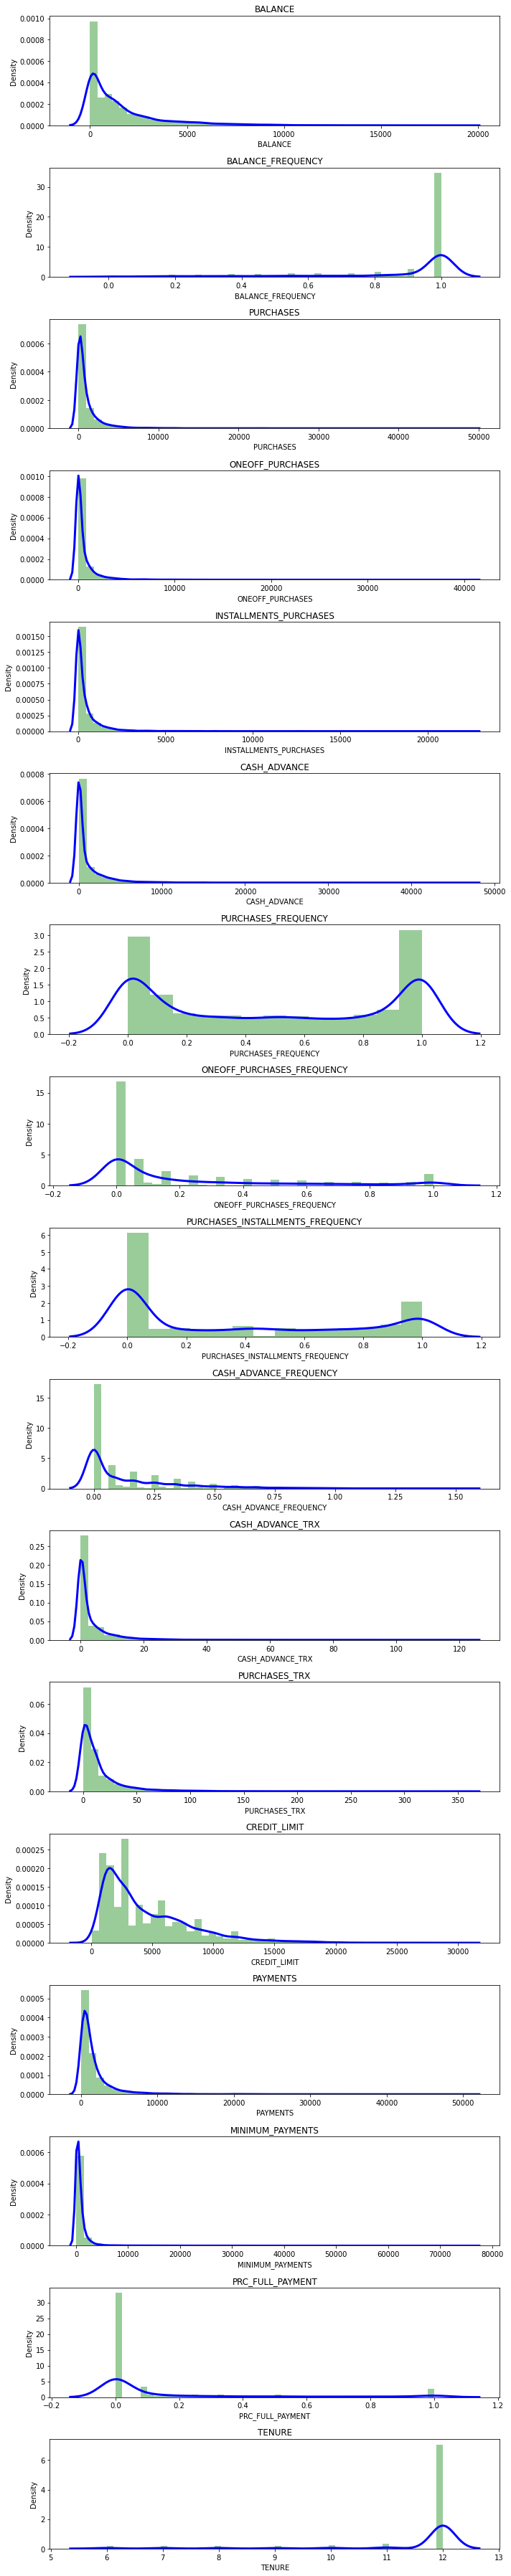

In [21]:
#distplot; combination of matplotlib.hist function and seaborn kdeplot()
#KDE:kernal density estimate, used for probaibilty densitity visualizing the continuous variable.
#for visualization only
plt.figure(figsize=(10,50))
for i in range(len(creditcard_df.columns)):
  plt.subplot(17,1,i+1) 
  sns.distplot(creditcard_df[creditcard_df.columns[i]],kde_kws={"color":"b", "lw":3, "label":"KDE" },hist_kws={"color":"g"})
  plt.title(creditcard_df.columns[i])

plt.tight_layout()

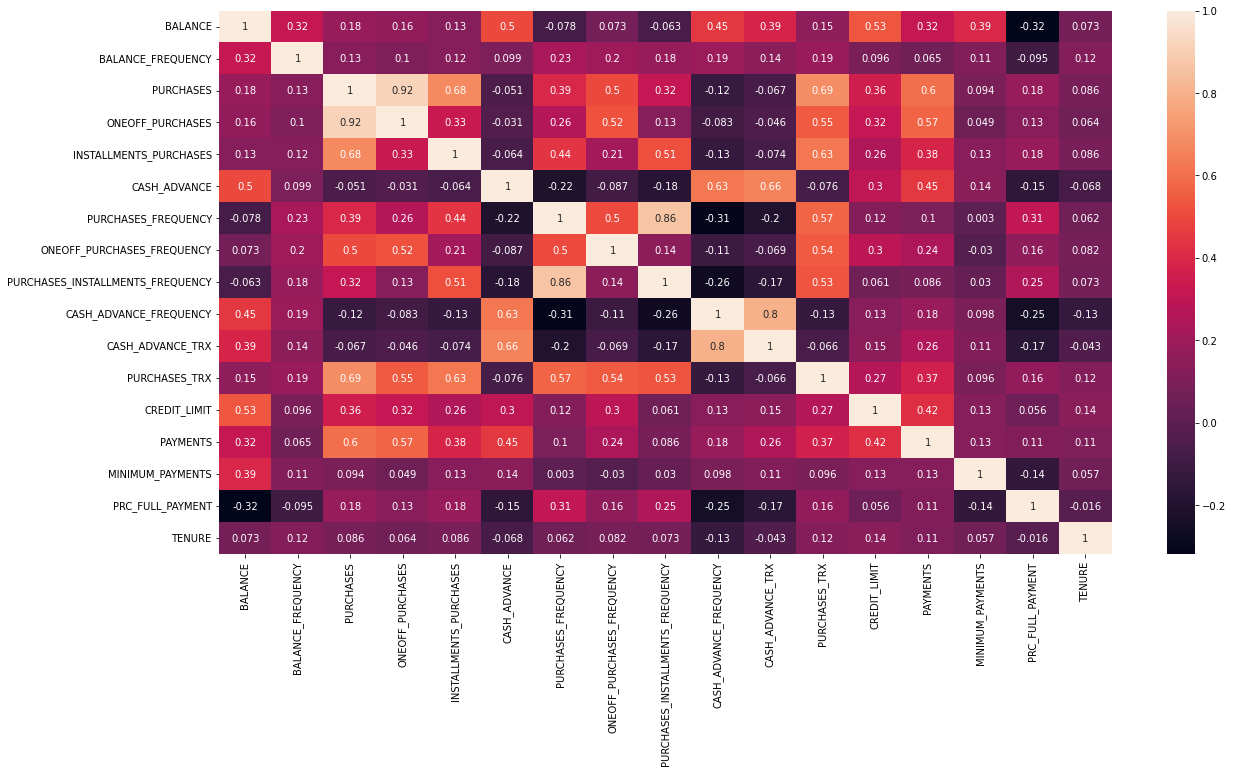

In [22]:
#obtain the correlation matrix using heatmap
correlations=creditcard_df.corr()
f,ax=plt.subplots(figsize=(20,10)) #for enlarging the plot
sns.heatmap(correlations, annot=True)

STEP 3: K mean algorithmn

Every cluster have their centeriod.
Each datapoint to the nearest centroid.

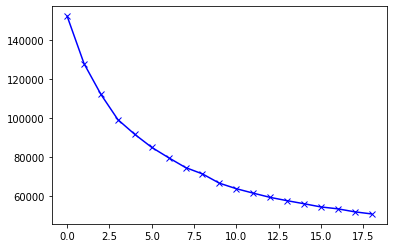

In [23]:
#Elbow method
scaler=StandardScaler()
creditcard_df_s=scaler.fit_transform(creditcard_df)
creditcard_df_s #range of data lies between -1 and 1.
scores=[]
range_value=range(1,20)
for i in range_value:
  kmean=KMeans(n_clusters=i)
  kmean.fit(creditcard_df_s) #passing complete data here. ..._s[:,:8], eight column only. elbow changes
  scores.append(kmean.inertia_)
plt.plot(scores,'bx-')

#number of cluster between 7 and 8.

In [24]:
kmeans=KMeans(7)
kmeans.fit(creditcard_df_s)
label=kmeans.labels_


In [25]:
kmeans.cluster_centers_.shape  #seven center and every centre has 17 columns

(7, 17)

In [26]:
cluster_centers=pd.DataFrame(data=kmeans.cluster_centers_,columns=[creditcard_df.columns])
cluster_centers #creating dataframe of cluster centers but column of previous data.

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.008487,0.402889,-0.343981,-0.225182,-0.399531,-0.103690,-0.810698,-0.335819,-0.753144,0.086196,-0.040329,-0.464718,-0.300958,-0.248705,-0.015705,-0.452469,0.272336
1,0.137070,0.430102,0.947345,0.900620,0.585371,-0.305966,1.094709,1.870062,0.540106,-0.406993,-0.316254,1.209863,0.710390,0.397038,-0.032457,0.457805,0.307684
2,-0.370769,0.330741,-0.040396,-0.232993,0.332362,-0.368836,0.979249,-0.353744,1.170654,-0.478479,-0.363146,0.170577,-0.278294,-0.222773,-0.029585,0.306098,0.252368
3,1.443484,0.415902,7.043767,6.181111,5.296366,0.029765,1.084224,1.874158,1.042173,-0.253894,-0.050586,4.698379,2.166844,4.825204,1.092576,0.814424,0.333671
4,-0.335506,-0.348076,-0.284525,-0.208973,-0.288475,0.065539,-0.198735,-0.272572,-0.230755,0.304112,-0.002216,-0.385586,-0.556898,-0.390701,-0.209383,0.012899,-3.193765
5,-0.701872,-2.134325,-0.306924,-0.230292,-0.302515,-0.323078,-0.547138,-0.427951,-0.441452,-0.522249,-0.376815,-0.416568,-0.172739,-0.201746,-0.257554,0.295010,0.200781
6,1.667776,0.392106,-0.205570,-0.150112,-0.210369,1.996073,-0.457009,-0.190820,-0.405141,1.909769,1.922448,-0.243621,1.009586,0.835208,0.553510,-0.390709,0.068828


In [27]:
#seeing actual values, inverse transform instead of 
cluster_centers=scaler.inverse_transform(cluster_centers)
cluster_centers=pd.DataFrame(data=cluster_centers, columns=[creditcard_df.columns])
cluster_centers 


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1582.140091,0.972711,268.284303,218.681992,49.776443,761.428796,0.164978,0.102276,0.065118,0.152393,2.973610,3.158691,3399.442881,1013.167803,827.606371,0.021375,11.881773
1,1849.775357,0.979158,3027.220969,2087.282608,940.411174,337.246964,0.929710,0.760334,0.579089,0.053701,1.090623,44.782506,7079.138907,2882.530597,788.565860,0.287615,11.929078
2,792.750865,0.955620,916.898638,205.716340,711.618258,205.405195,0.883370,0.096929,0.829685,0.039396,0.770620,18.949732,3481.903466,1088.239096,795.259077,0.243243,11.855051
3,4568.965194,0.975794,16052.320602,10851.814819,5200.505783,1041.289988,0.925502,0.761555,0.778624,0.084337,2.903614,131.493976,12378.313253,15701.636847,3410.408242,0.391920,11.963855
4,866.148306,0.794815,395.311749,245.585564,150.203132,1116.308792,0.410589,0.121144,0.272729,0.196000,3.233704,5.125596,2468.226470,602.104087,376.247870,0.157487,7.243243
5,103.587241,0.371669,347.456361,210.199629,137.506773,301.361116,0.270757,0.074792,0.188993,0.030637,0.677338,4.355518,3865.955724,1149.108580,263.988609,0.240000,11.786015
6,5035.809952,0.970157,564.002413,343.282750,220.833771,5164.728655,0.306931,0.145532,0.203424,0.517308,16.368126,8.654321,8167.737986,4150.987802,2154.138103,0.039439,11.609428


In [28]:
label.min() #min is zero, max is six

0

In [29]:
y=kmeans.fit_predict(creditcard_df_s) #passing scaled data
y

array([1, 4, 2, ..., 3, 3, 3], dtype=int32)

In [30]:
#clusterlabel
creditcard_df_cluster=pd.concat([creditcard_df,pd.DataFrame({'cluster':label})],axis=1)
creditcard_df_cluster

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,6
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,4
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6,4
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,4
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,4


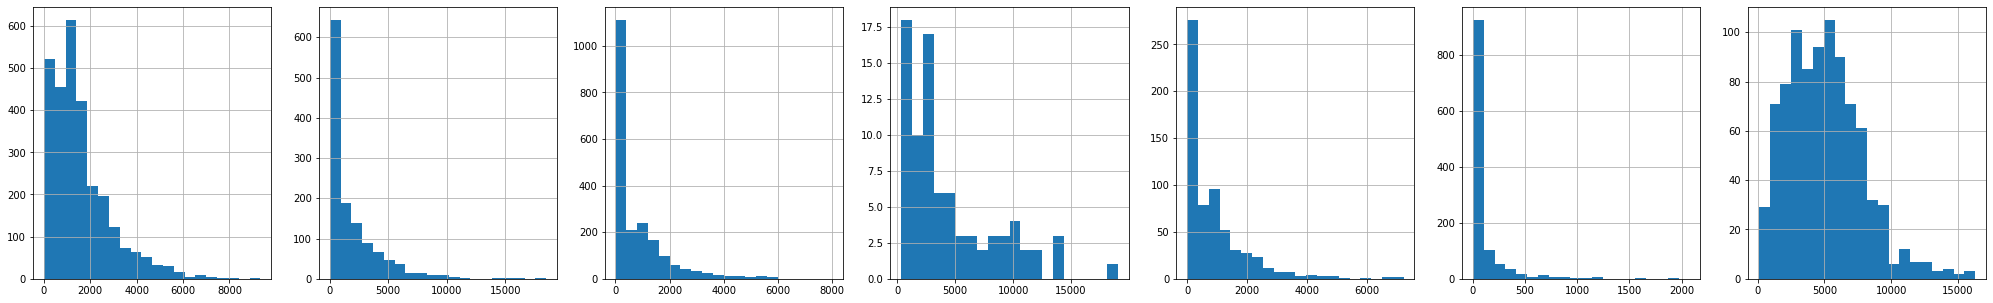

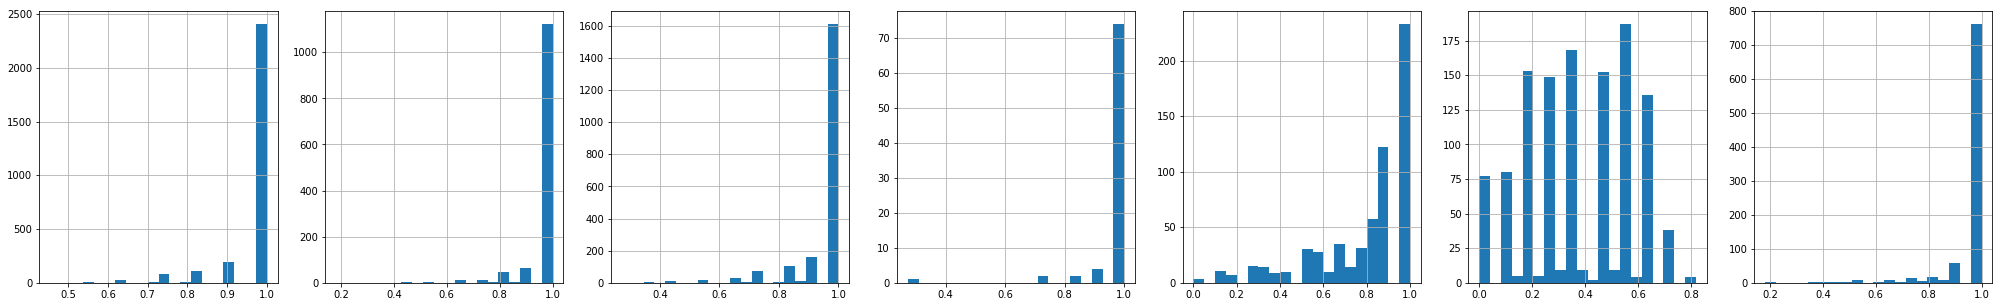

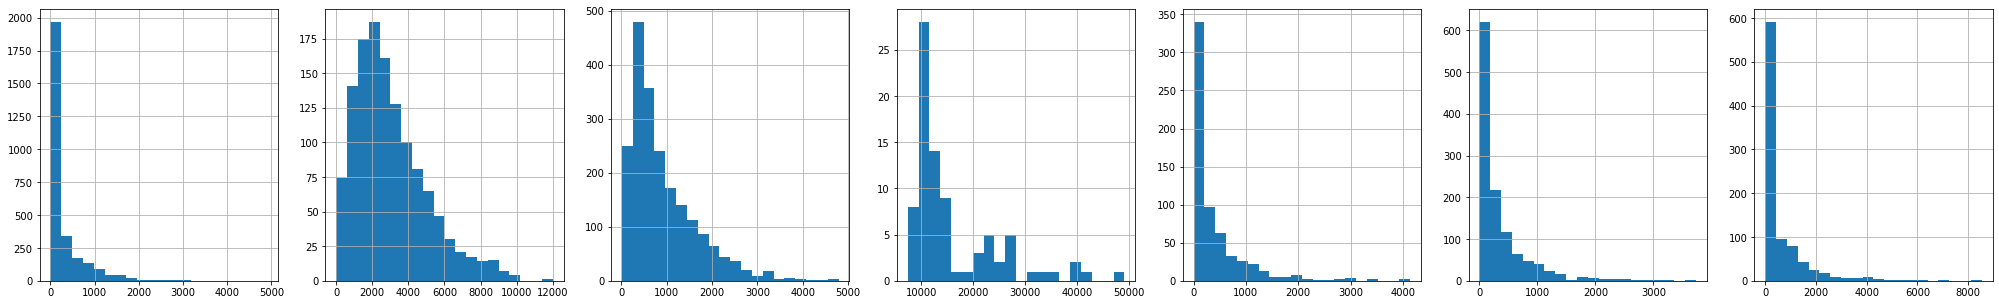

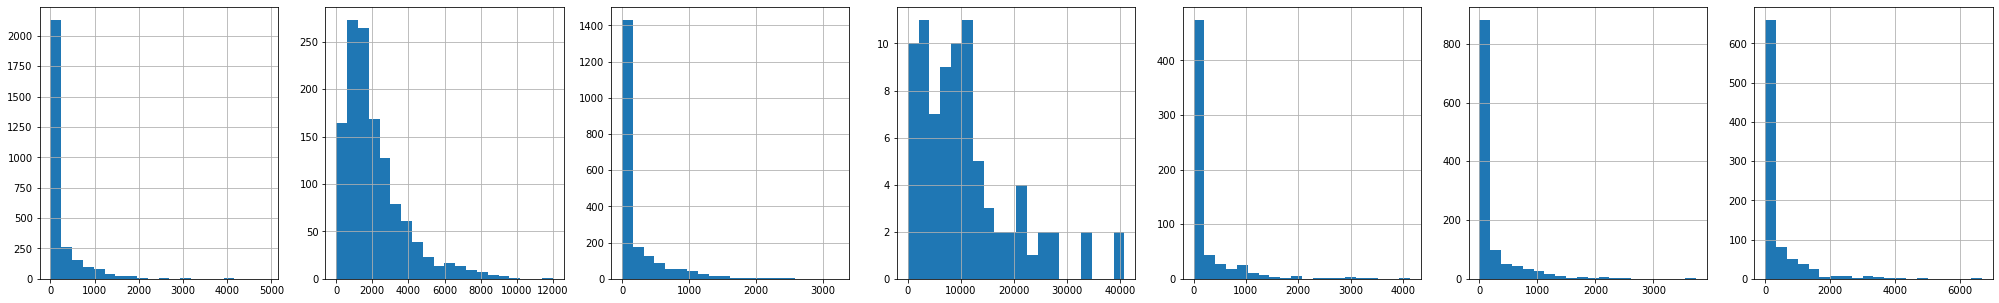

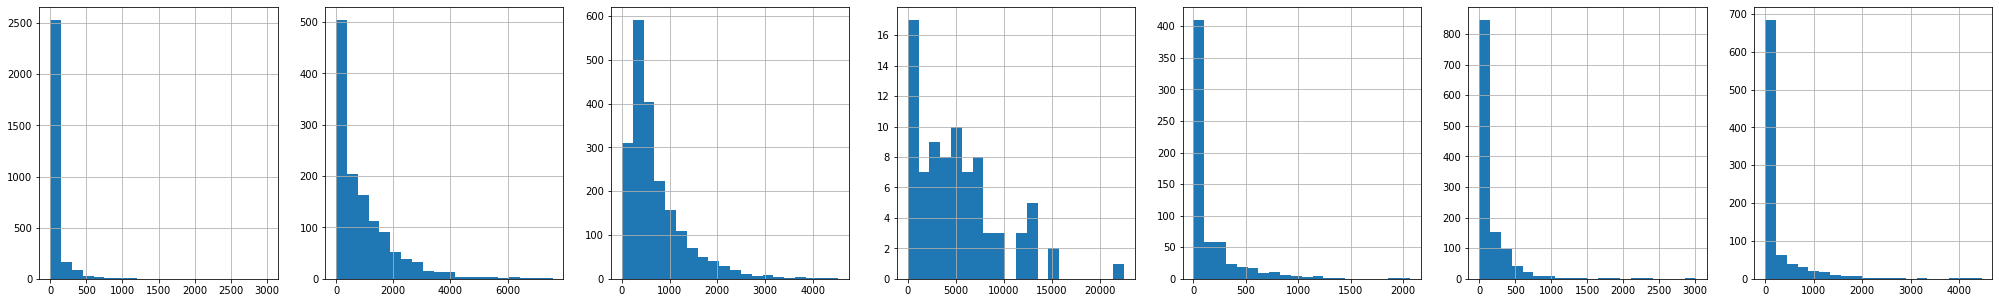

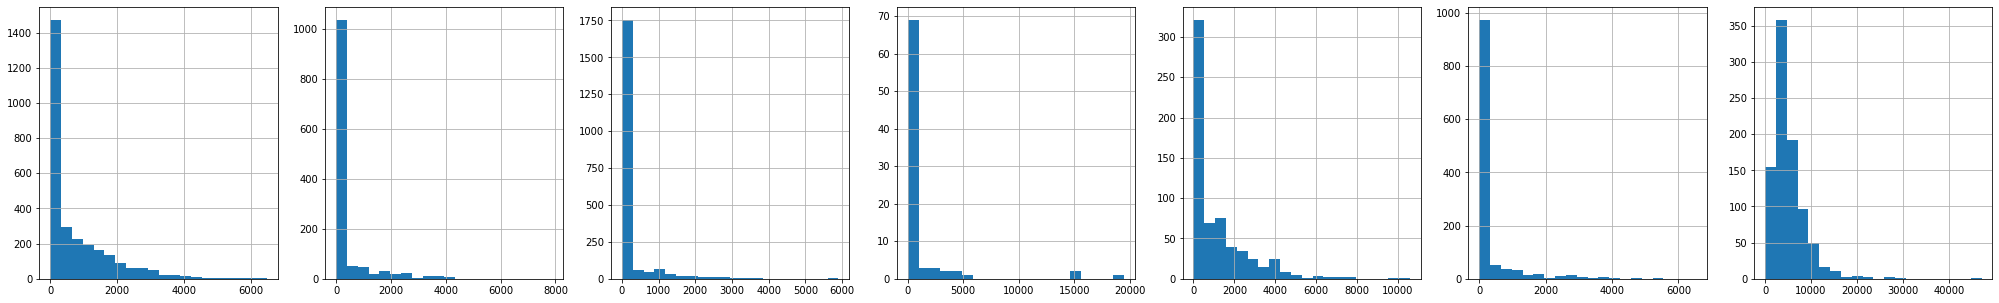

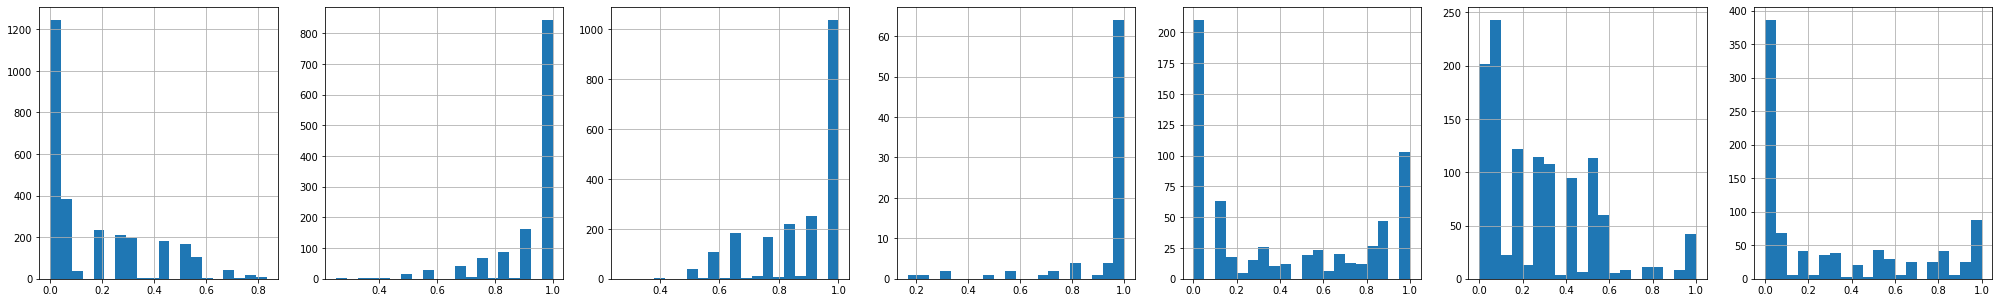

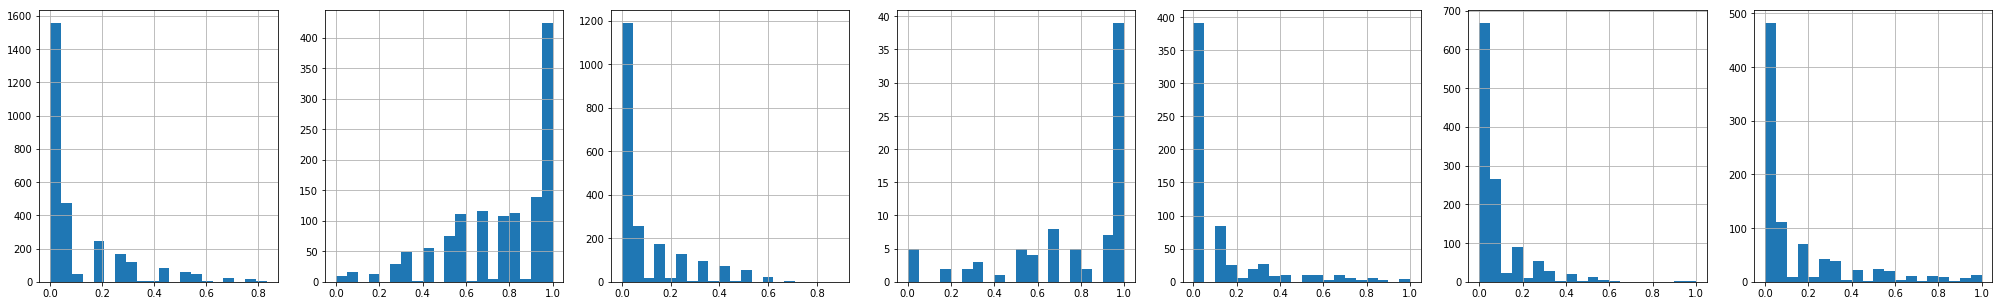

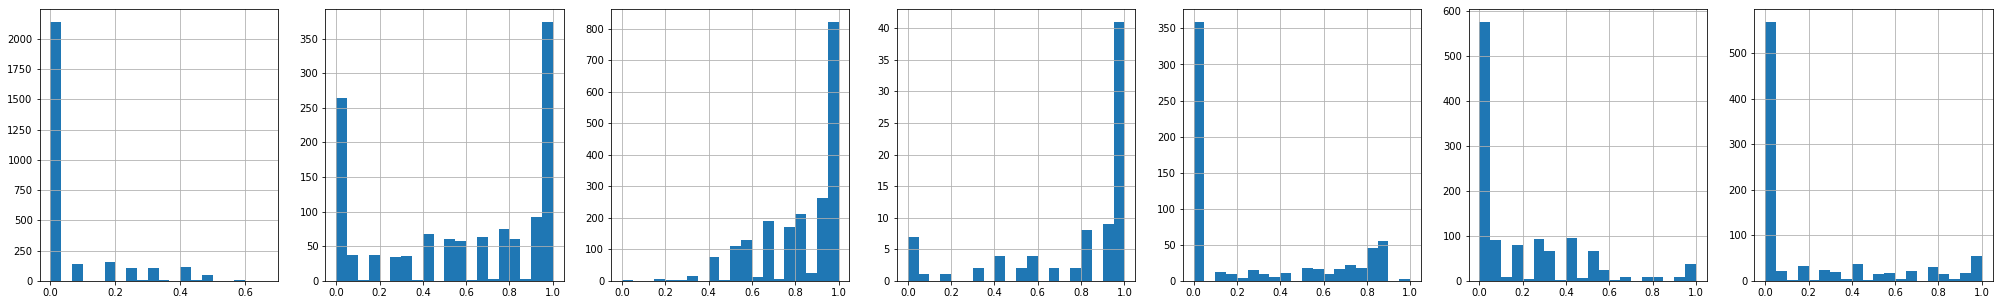

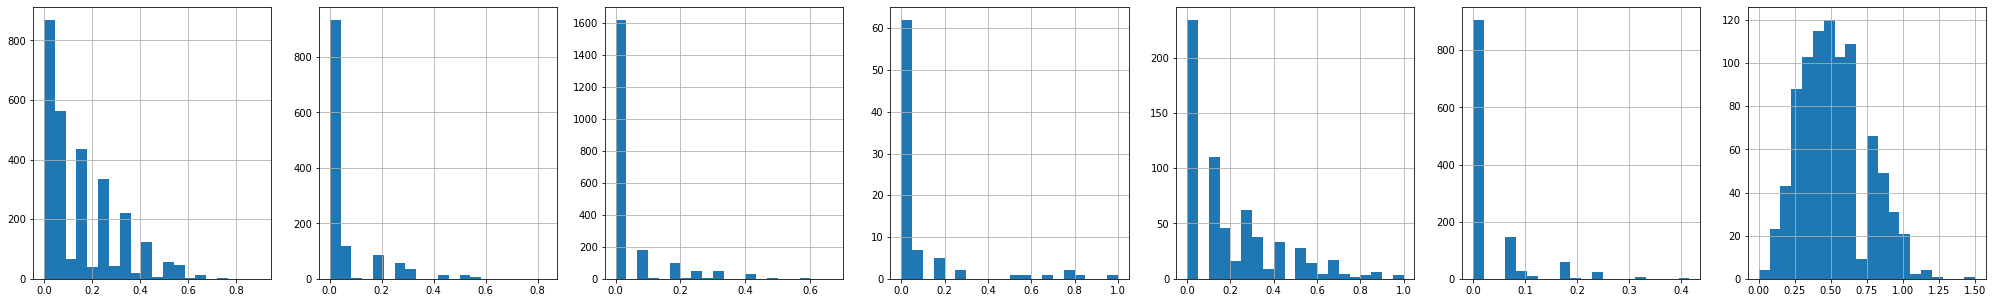

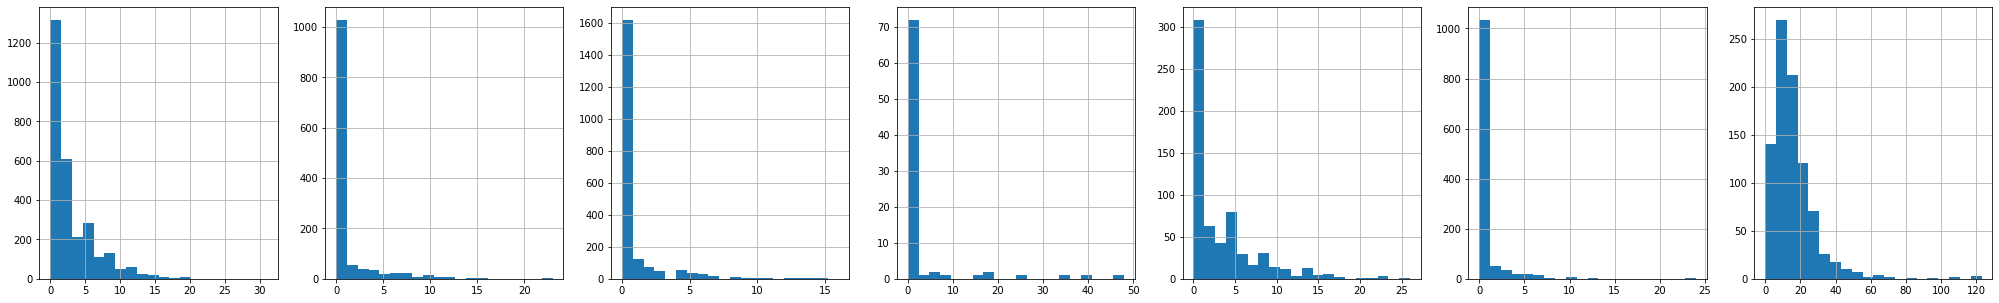

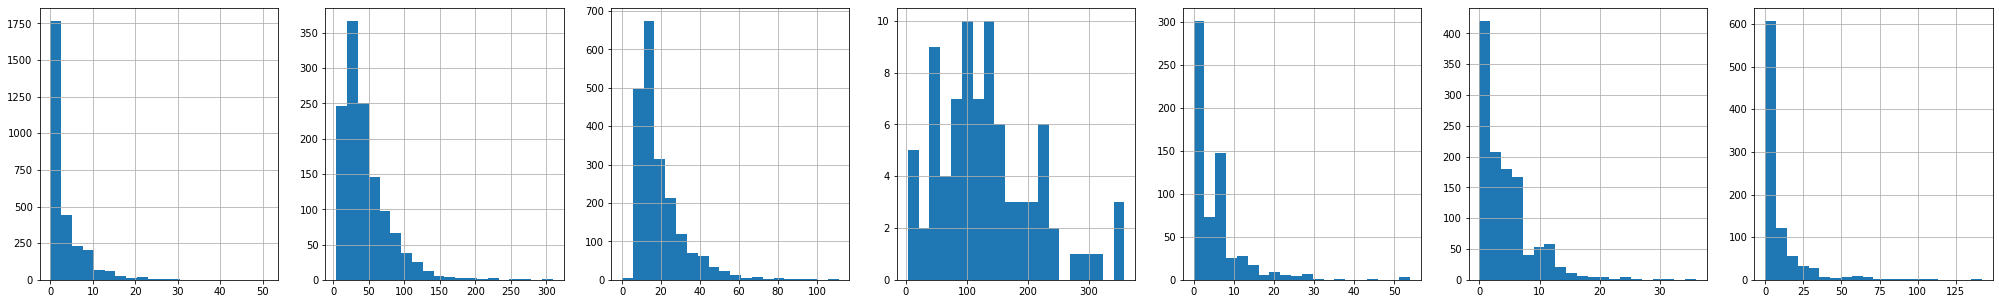

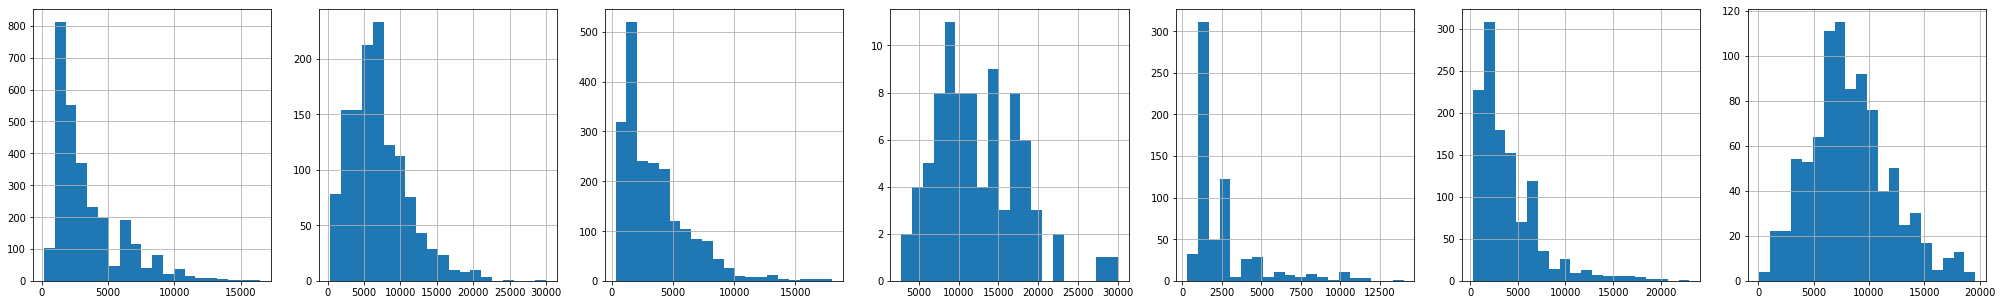

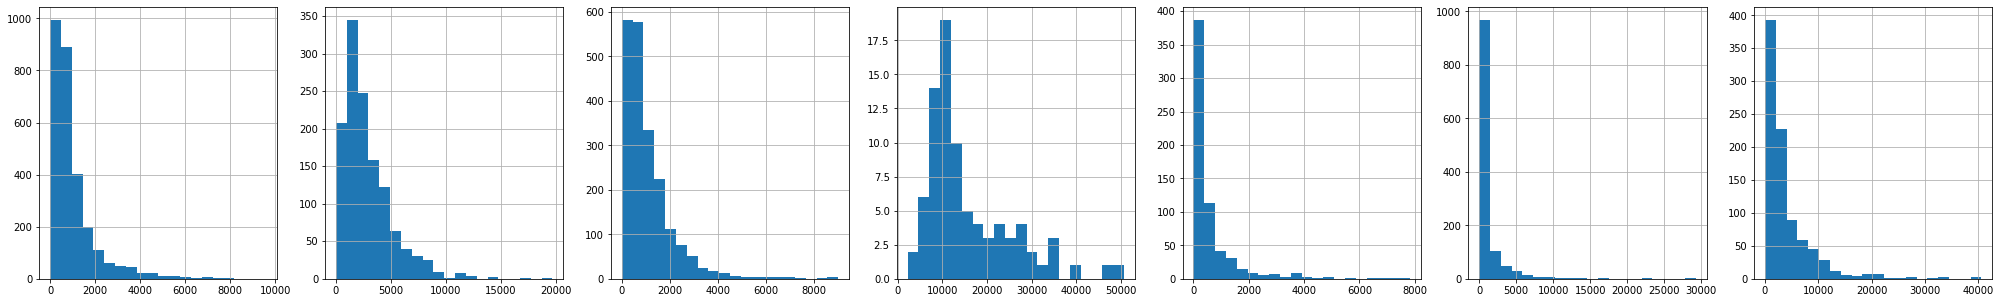

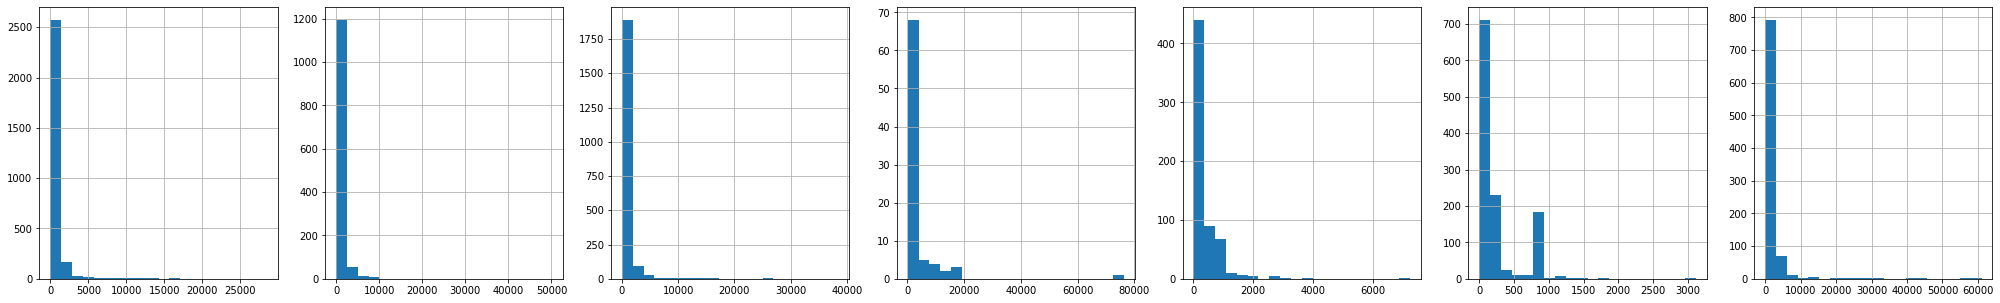

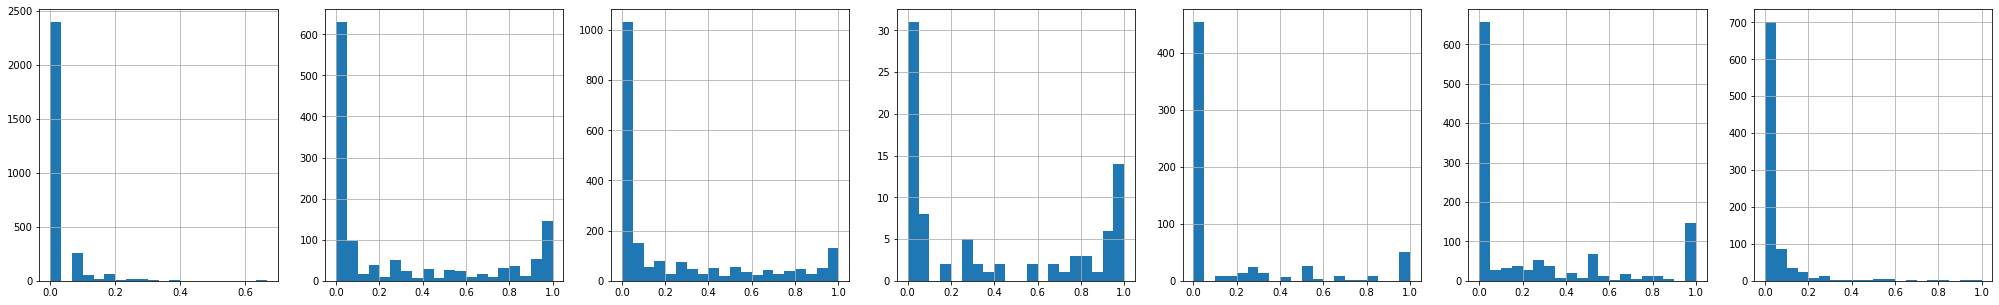

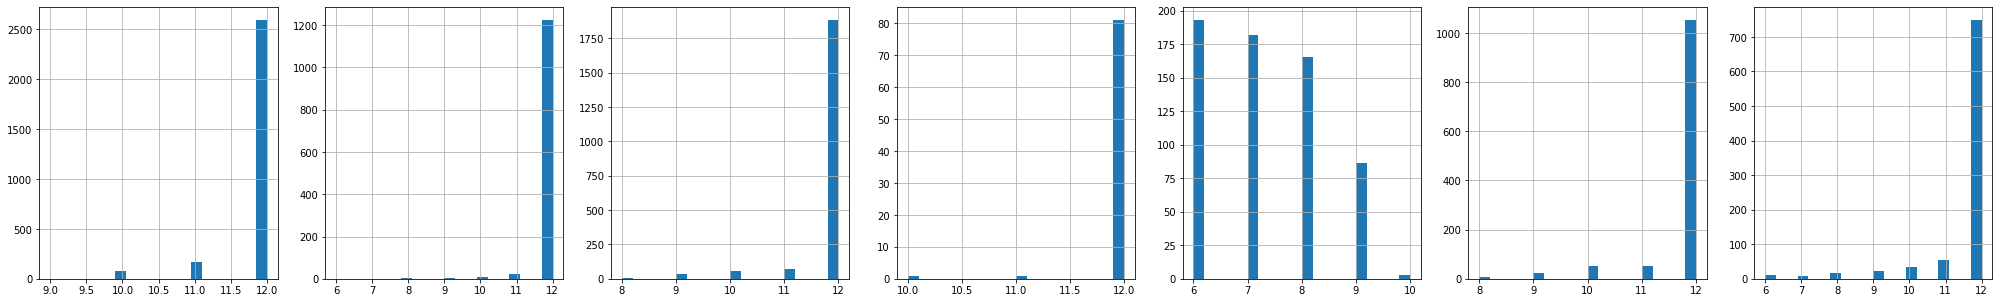

In [31]:
#histogram of various cluster, data visualization
for i in creditcard_df.columns:
  plt.figure(figsize=(35,5))
  for j in range(7): #seven cluster
    plt.subplot(1,7,j+1)
    cluster=creditcard_df_cluster[creditcard_df_cluster.cluster==j]
    cluster[i].hist(bins=20)
  plt.show()
  #every clusterplots for every columns


In [32]:
#understanding PCA perform dimensionality reductions
pca=PCA(n_components=2) #two only
principal_comp=pca.fit_transform(creditcard_df_s)
principal_comp

array([[-1.68222211, -1.07645196],
       [-1.13830709,  2.50645733],
       [ 0.96970543, -0.38348043],
       ...,
       [-0.92620532, -1.81078716],
       [-2.33655531, -0.65797346],
       [-0.55641316, -0.40045615]])

In [35]:
pca_df=pd.DataFrame(data=principal_comp,columns=['pca1','pca2'])
pca_df

,pca1,pca2
0,-1.682222,-1.076452
1,-1.138307,2.506457
2,0.969705,-0.383480
3,-0.873630,0.043164
4,-1.599436,-0.688582
...,...,...
8945,-0.359632,-2.016149
8946,-0.564364,-1.639113
8947,-0.926205,-1.810787
8948,-2.336555,-0.657973


In [36]:
#Visualization: concate cluster label to dataframe
pca_df=pd.concat([pca_df,pd.DataFrame({'cluster':label})],axis=1)
pca_df

,pca1,pca2,cluster
0,-1.682222,-1.076452,0
1,-1.138307,2.506457,6
2,0.969705,-0.383480,1
3,-0.873630,0.043164,0
4,-1.599436,-0.688582,0
...,...,...,...
8945,-0.359632,-2.016149,4
8946,-0.564364,-1.639113,4
8947,-0.926205,-1.810787,4
8948,-2.336555,-0.657973,4


In [ ]:
#plotting for better visualization
plt.figure(figsize=(10,10))
ax=sns.scatterplot(x='pca1',y='pca2',hue='cluster',data=pca_df,palette=['red','green','blue','yellow','pink','grey','purple'])
plt.show()